# Preprocessing and Modelling

## Importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer # treat only specific columns like encode this and not that
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold



In [4]:
df = pd.read_csv('Data/movie_data_w_star_power.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_26920\3917288982.py:1: DtypeWarning: Columns (6,18,19,20,21,23,25,27,28,29,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/movie_data_w_star_power.csv')


In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,0,0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,...,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,1,1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,...,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,2,2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,...,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,3,3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,...,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,4,4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,...,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)


In [7]:
df.head()

,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,certificate,rating,director,director_id,star,star_id,votes,collection_id,collection_name,spoken_language_1,spoken_language_2,production_company_1_name,production_company_1_id,production_company_2_name,production_company_2_id,production_company_3_name,production_company_3_id,production_country_1_name,production_country_2_name,production_country_3_name,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Aniplex,genre_BROSTA TV,genre_Biography,genre_Carousel Productions,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Foreign,genre_Game-Show,genre_GoHands,genre_History,genre_Horror,genre_Mardock Scramble Production Committee,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Odyssey Media,genre_Pulser Productions,genre_Reality-TV,genre_Rogue State,genre_Romance,genre_Sci-Fi,genre_Science Fiction,genre_Sentai Filmworks,genre_Sport,genre_TV Movie,genre_Telescene Film Group Productions,genre_The Cartel,genre_Thriller,genre_Vision View Entertainment,genre_War,genre_Western,revenue,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,English,NaN,Pixar Animation Studios,3.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,373554033.0,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,Français,TriStar Pictures,559.0,Teitler Film,2550.0,Interscope Communications,10201.0,United States of America,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262797249.0,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,English,NaN,Warner Bros.,6194.0,Lancaster Gate,19464.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,Twentieth Century Fox Film Corporation,306.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81452156.0,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection,English,NaN,Sandollar Productions,5842.0,Touchstone Pictures,9195.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76578911.0,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


## Feature Selection

In [8]:
X = df[['budget','release_year','release_month','runtime','certificate','star_power','director_power']]
y = df['movie_class']

In [9]:
X.isna().sum()

budget                 0
release_year           0
release_month     119322
runtime            53899
certificate       724919
star_power             0
director_power         0
dtype: int64

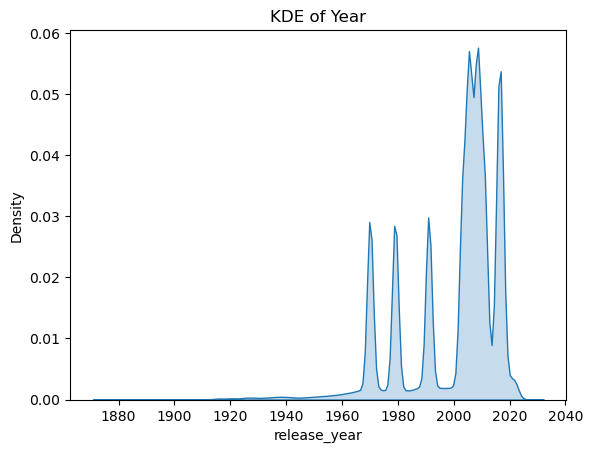

In [10]:
sns.kdeplot(X['release_year'], fill=True)
plt.title("KDE of Year")
plt.show()

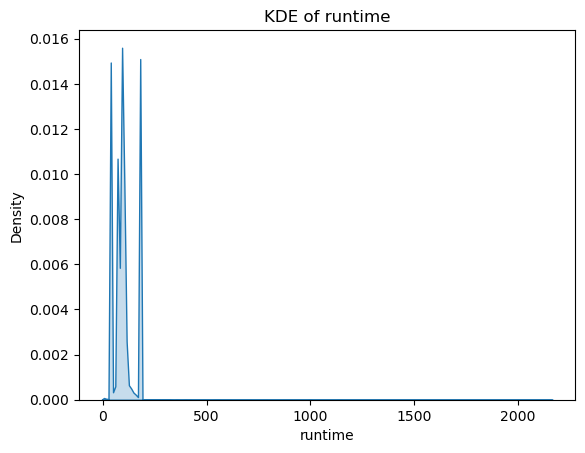

In [11]:
sns.kdeplot(X['runtime'], fill=True)
plt.title("KDE of runtime")
plt.show()

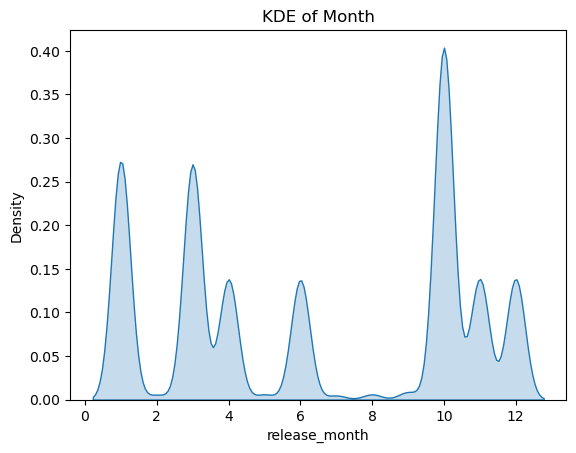

In [12]:
sns.kdeplot(X['release_month'], fill=True)
plt.title("KDE of Month")
plt.show()

In [13]:
X['certificate'].unique()

array([nan, 'Approved', 'Passed', 'R', 'PG', 'Not Rated', 'G', 'GP',
       'M/PG', 'Unrated', 'TV-PG', 'TV-14', 'PG-13', 'TV-MA', '18+',
       '13+', 'M', 'TV-Y7', 'TV-G', 'NC-17', '16+', 'X', 'TV-Y7-FV',
       'TV-Y', '12', 'MA-13', 'E', 'T', 'E10+', 'Open', 'AO', 'TV-13'],
      dtype=object)

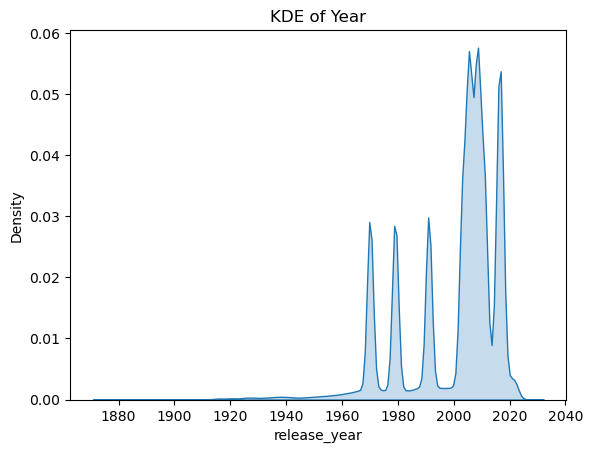

In [14]:
sns.kdeplot(X['release_year'], fill=True)
plt.title("KDE of Year")
plt.show()

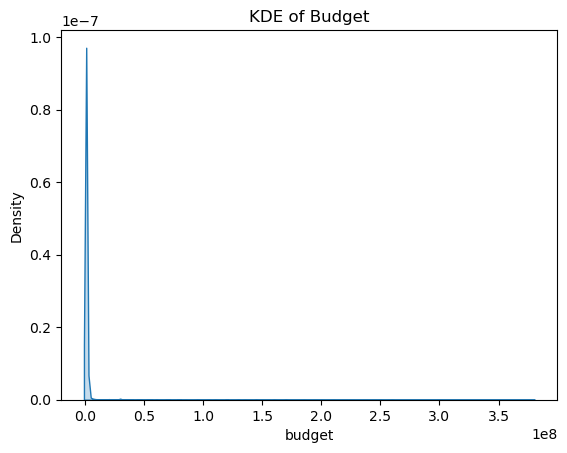

In [15]:
sns.kdeplot(X['budget'], fill=True)
plt.title("KDE of Budget")
plt.show()

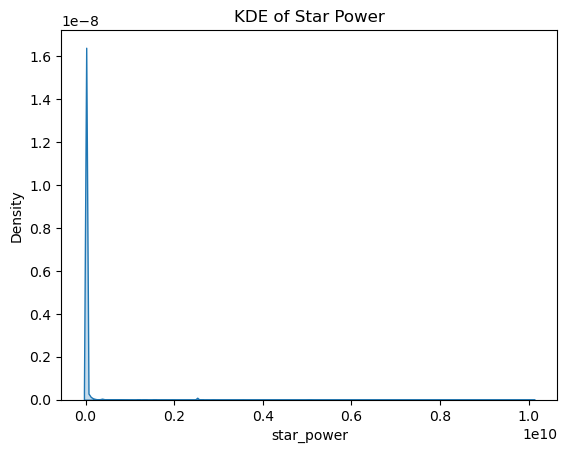

In [16]:
sns.kdeplot(X['star_power'], fill=True)
plt.title("KDE of Star Power")
plt.show()

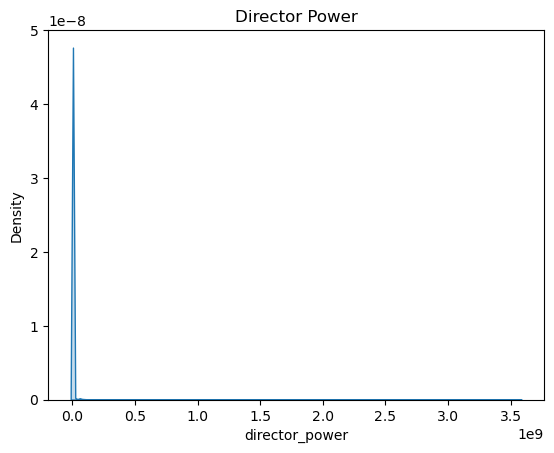

In [17]:
sns.kdeplot(X['director_power'], fill=True)
plt.title("Director Power")
plt.show()

## Splitting the dataset into test and train

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Combining and Pipelining

### Scaling and Imputation

In [19]:
numeric_min_max = ['budget', 'director_power', 'star_power']
numeric_standard = ['release_month', 'release_year']
categorical_features = ['certificate']

numeric_transformer_imputer = Pipeline([
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler_standard', StandardScaler())
])
numeric_transformer_min_max = Pipeline([
    ('scaler_min_max', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Rated')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer_imputer, numeric_standard),
        ('cat', categorical_transformer, categorical_features),
        ('num2', numeric_transformer_min_max, numeric_min_max),
    ])



Have used Itertive Imputer for numeric transformer as budget, director_power and star_power are some features which depend on other movie column information such as director power can depened on the production company, genre of the movie, budget also depends on the country of origin, release year, genre, the duration and similarly the star power depends on the genre, the release year and so on. Hence in order to address the interactive/dependent relationship between columns the iterative imputer has been utlisied in order to fill the missing values. If we did use simple imputer it seems illogical to fill these columns with mean, median or both because these column are independent and unique from movie to movie

We have also observed the that distribution of the above mentioned columns are towards the skewed (mean is not a good centrality measure) hence Min Max scaler has been used.

We have also observed the that distribution of the columns: 'release_month', 'release_year' are towards the mean (mean is a good centrality measure) hence Standard Scaler has been used.



While for categorical columns certificate: as it is individual movie characteristics we have used "Not Rated" to fill the null values (created a new unique column value). We have also used One hot encoder as there is no sense of oridinality among the values and as they unique values are also less in number it does not affect the computation much.

### Modelling

In [20]:
type(np.array(preprocessor.fit_transform(X_train)))

numpy.ndarray

In [22]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingClassifier

# Create a pipeline with a classifier and a preprocessor
gradient_boosting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(verbose =2, n_iter_no_change=3))
])
  

# gradient_boosting_pipeline.fit(X_train, y_train)

In [23]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.01, 0.001],
    'classifier__max_depth': [3, 5],
    'classifier__max_features': [5, 10]
}

# Create the grid search
grid = GridSearchCV(gradient_boosting_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit the grid search on the data
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid.best_params_)

# Print the cross-validated accuracy
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate on the test set
test_accuracy = grid.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

      Iter       Train Loss   Remaining Time 
         1           0.4421            2.20m
         2           0.4319            2.29m
         3           0.4308            2.25m
         4           0.4290            2.23m
         5           0.4222            2.20m
         6           0.4135            2.18m
         7           0.4062            2.13m
         8           0.3941            2.08m
         9           0.3835            2.04m
        10           0.3786            1.99m
        11           0.3721            1.94m
        12           0.3706            1.89m
        13           0.3663            1.84m
        14           0.3607            1.78m
        15           0.3553            1.73m
        16           0.3453            1.67m
        17           0.3423            1.62m
        18           0.3399            1.57m
        19           0.3345            1.52m
        20           0.3255            1.47m
        21           0.3192            1.41m
        2

In [ ]:
# Access and print the cross-validation results
cv_results = grid.cv_results_
print("Cross-Validation Results:")
print(cv_results['mean_test_score'])
print("Best Parameter Combination:", grid.best_params_)
print("Best CV Score:", grid.best_score_)